## Import modules

In [1]:
# this is for the jupyter notebook at JupyterLab
# to make sys.path between the terminal and Jupyter same
import sys

print(sys.path) # especially the path to site-packages are different... so thats why couldn't find correct package...

# sys.path from terminal at scvi0190_env
# obtained by excuting `python -c "import sys; print('\n'.join(sys.path))"`
sys.path = [
    "/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python39.zip",
    "/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9",
    "/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/lib-dynload",
    "/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages"
]

print(sys.path)

['/nfs/team205/kk18/Analysis/scVI/notebooks', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python39.zip', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/lib-dynload', '', '/nfs/users/nfs_k/kk18/.local/lib/python3.9/site-packages', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages']
['/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python39.zip', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/lib-dynload', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages']


In [2]:
# import warnings
# warnings.simplefilter("ignore", UserWarning)

import anndata
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import numpy.random as random
import pandas as pd
import scanpy as sc

import scvi

Global seed set to 0
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.

In [3]:
import gc
import torch

In [4]:
import session_info
session_info.show()

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'RdPu',)

## Read in anndata

In [6]:
!ls -lh /nfs/team205/heart/anndata_objects/Foetal/QC/

total 18G
drwxrwsr-x 2 kk18 team205   213 Aug 17  2022 multiome_ATAC
-rw-rw-r-- 1 kk18 team205   11M Feb  8  2023 Multiome_rm-doublets.txt
-rw-rw-r-- 1 kk18 team205  4.3G Feb  8  2023 multiome_RNA_foetal.h5ad
-rw-rw-r-- 1 kk18 team205   12G Feb  8  2023 multiome_RNA_foetal_prefilter.h5ad
-rw-rw-r-- 1 kk18 team205  2.0G Dec 30  2022 scRNA_foetal.h5ad
-rw-rw-r-- 1 kk18 team205  2.6G Dec 12 15:09 scRNA_foetal_include-doublets_13Dec2023.h5ad
-rw-rw-r-- 1 kk18 team205  2.9G Dec 23  2022 scRNA_foetal_prefilter.h5ad
-rw-rw-r-- 1 kk18 team205 1017K Dec 30  2022 scRNA_rm-doublets.txt
-rw-rw-r-- 1 kk18 team205  4.2M Apr  4 22:13 T21_Multiome_rm-doublets.txt
-rw-rw-r-- 1 kk18 team205  2.3G Apr  4 22:16 T21_multiome_RNA_foetal.h5ad
-rw-rw-r-- 1 kk18 team205  5.5G Apr  4 21:46 T21_multiome_RNA_foetal_prefilter.h5ad


In [7]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/QC/T21_multiome_RNA_foetal.h5ad')
adata

AnnData object with n_obs × n_vars = 121452 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'batch_key'
    var: 'gene_name', 'feature_type', 'ambient_expression-0', 'ambient_expression-1', 'ambient_expression-10', 'ambient_expression-11', 'ambient_expression-12', 'ambient_expression-13', 'ambient_expression-14', 'ambient_expression-2', 'ambient_expression-3', 'ambient_expression-4', 'ambient_expression-5', 'ambient_expression-6', 'ambient_expression-7', '

In [8]:
adata.X.data[:10]

array([ 1.,  2.,  4.,  1.,  3.,  3., 12.,  6.,  2.,  2.], dtype=float32)

In [9]:
print(adata.obs['batch_key'].value_counts())
print(adata.obs['cell_or_nuclei'].value_counts())

Hst42_Nuclei_Multiome-v1    70685
Hst32_Nuclei_Multiome-v1    23019
Hst44_Nuclei_Multiome-v1    22517
Hst48_Nuclei_Multiome-v1     5231
Name: batch_key, dtype: int64
Nuclei    121452
Name: cell_or_nuclei, dtype: int64


## Pre-process

In [10]:
# preserve raw count
adata.layers["counts"] = adata.X.copy()

# filter genes
sc.pp.filter_genes(adata, min_cells=3)

# normalise and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.shape

filtered out 3535 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:03)


(121452, 33066)

extracting highly variable genes
    finished (0:00:16)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
3789


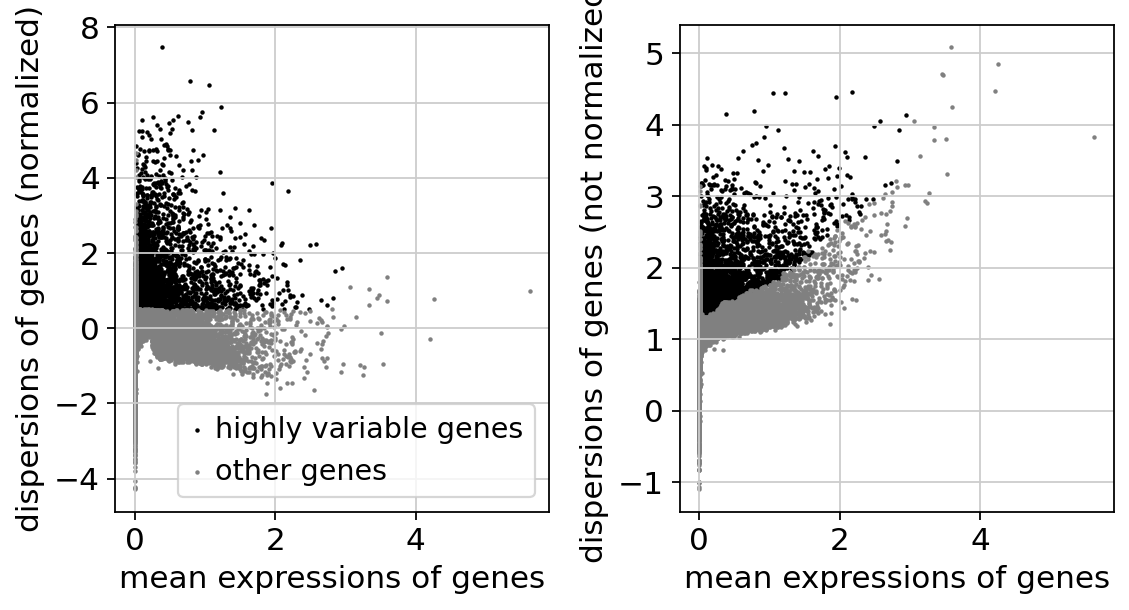

In [11]:
# hvg
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key='batch_key')

print(sum(adata.var.highly_variable))
sc.pl.highly_variable_genes(adata)

In [12]:
# freeze the state in `.raw`
# adata.raw = adata
# subset hvgs
adata = adata[:, adata.var.highly_variable]

## Setup anndata for scVI

In [13]:
adata = adata.copy()
scvi.model.SCVI.setup_anndata(adata, 
                              layer="counts", 
                              batch_key="batch_key",
                              continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


## Creating and training a model

In [15]:
vae = scvi.model.SCVI(adata, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
vae

SCVI Model with the following params: 
n_hidden: 128, n_latent: 50, n_layers: 3, dropout_rate: 0.1, dispersion: gene-batch, gene_likelihood: zinb, 
latent_distribution: normal
Training status: Not Trained

In [16]:
vae.view_anndata_setup(adata)

Anndata setup with scvi-tools version 0.19.0.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': 'counts',
│   'batch_key': 'batch_key',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': ['total_counts', 'pct_counts_mt', 'pct_counts_ribo']
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   4    │
│         n_cells          │ 121452 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   3    │
│         n_labels         │   1    │
│          n_vars          │  3789  │
└──────────────────────────┴────────┘

                            Data Registry                            
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Registry Key      ┃            scvi-tools Location            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X           │          adata.layers['counts']           │
│         batch         │         adata.obs['_scvi_batch']          │
│ extra_continuous_covs │ adata.obsm['_scvi_extra_continuous_covs'] │
│        labels         │         adata.obs['_scvi_labels']         │
└───────────────────────┴───────────────────────────────────────────┘

                           batch State Registry                            
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃        Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ Hst32_Nuclei_Multiome-v1 │          0          │
│                        │ Hst42_Nuclei_Multiome-v1 │          1          │
│                        │ Hst44_Nuclei_Multiome-v1 │          2          │
│                        │ Hst48_Nuclei_Multiome-v1 │          3          │
└────────────────────────┴──────────────────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

  extra_continuous_covs State   
            Registry            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │
│  adata.obs['pct_counts_mt']  │
│ adata.obs['pct_counts_ribo'] │
└──────────────────────────────┘

In [17]:
# train
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 66/66: 100%|██████████| 66/66 [14:43<00:00, 13.02s/it, loss=1.2e+03, v_num=1] 

`Trainer.fit` stopped: `max_epochs=66` reached.


Epoch 66/66: 100%|██████████| 66/66 [14:43<00:00, 13.39s/it, loss=1.2e+03, v_num=1]


## Save

In [18]:
# save scvi model
vae.save("/nfs/team205/heart/anndata_objects/Foetal/scVI/models/RNA_foetal_T21/",overwrite=True)

In [19]:
# save anndata
adata.obsm["X_scVI"] = vae.get_latent_representation()
adata.write('/nfs/team205/heart/anndata_objects/Foetal/scVI/T21_multiome_RNA_foetal_post-scVI.h5ad')

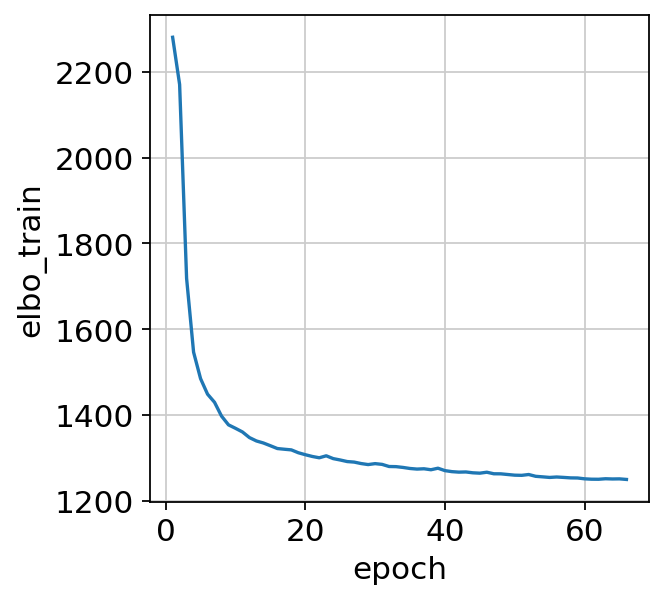

In [20]:
# Convergency plot
vae.history['elbo_train']
x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
plt.plot(x, vae.history['elbo_train'], label="train")
plt.xlabel('epoch')
plt.ylabel('elbo_train')
plt.show()

## Run per condition

* three conditions of complexity

In [ ]:
set(adata.obs[celltype_col])

In [ ]:
%%time
for cond in model_architecture_conditions:
    for celltype in set(adata.obs[celltype_col]):
        print(f'##############################')
        print(f'##### {cond}: {celltype} #####')
        print(f'##############################')

        # subset
        adata_sub = adata[adata.obs[celltype_col]==celltype]
        # filter genes
        sc.pp.filter_genes(adata_sub, min_cells=3)

        # setup anndata for scVI
        adata_sub = adata_sub.copy()
        scvi.model.SCVI.setup_anndata(adata_sub, 
                                  # layer="counts", 
                                  categorical_covariate_keys=['batch_key'],
                                  continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo',
                                                             'S_score', 'G2M_score'
                                                            ])
        # creating a model
        if cond == 'three-layer':
            vae = scvi.model.SCVI(adata_sub, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
        elif cond == 'two-layer':
            vae = scvi.model.SCVI(adata_sub, n_hidden=128, n_latent=50, n_layers=2, dispersion = 'gene-batch')
        elif cond == 'one-layer':
            vae = scvi.model.SCVI(adata_sub, n_hidden=128, n_latent=50, n_layers=1, dispersion = 'gene-batch')
        print(vae)
        vae.view_anndata_setup(adata_sub)
        # train
        vae.train()

        # save scvi model
        vae.save(f"/nfs/team205/heart/anndata_objects/Foetal/scVI/models/subsets/Foetal_multiome_{celltype}_{cond}/",overwrite=True)

        # save scVI lagent space
        adata_sub.obsm["X_scVI"] = vae.get_latent_representation()
        adata_sub.write(f'/nfs/team205/heart/anndata_objects/Foetal/scVI/subsets/Foetal_multiome_{celltype}_{cond}.h5ad')

        # Convergency plot
        vae.history['elbo_train']
        x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
        plt.plot(x, vae.history['elbo_train'], label="train")
        plt.xlabel('epoch')
        plt.ylabel('elbo_train')
        plt.title(f'{cond}: {celltype}')
        plt.show()

        del adata_sub, vae
        
        # free up GPU
        gc.collect()
        torch.cuda.empty_cache()
        print('')